In [54]:
# General purpose
import os
# Data manipulation
import pandas as pd
# Tensor manipulation
import numpy as np
# Visualization
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

# 1. Pose questions
* Is there correlation between age and survival?
* Does the passenger class affect the survival?
... 

# 2. Data wrangling
### 2.1 Get the data

In [76]:
df = pd.read_csv("data/train_community.csv") #pd.read_excel
df.head()

,ID,nro_casa,SEROPOSITIVO,Comunidad,INFESTADO,Tamano_com,Car_vivienda,distribución_viv,Pared_dormitorio,Techo_dormitorio,...,Tamaño_com_pequeña_Dummy,Tipo_distribucion_dispersa_Dummy,Suelo_de_tierra_Dummy,Alumbrado_electrico,vinchucas,nro_habitantes,nro_perros,nro_gatos,nro_conejos,nro_gallinas
0,1,1,0,1,0,1,3.0,3.0,4.0,5.0,...,1,0.0,1.0,0,0,11,1,0,0,20
1,2,2,0,1,0,1,1.0,3.0,6.0,1.0,...,1,0.0,0.0,0,0,5,3,0,0,20
2,3,3,0,1,0,1,3.0,3.0,7.0,5.0,...,1,0.0,1.0,0,0,1,0,0,0,0
3,4,4,0,1,0,1,2.0,1.0,4.0,5.0,...,1,1.0,1.0,0,0,3,1,0,0,0
4,5,5,0,1,0,1,2.0,3.0,NaN,1.0,...,1,0.0,1.0,0,0,6,1,0,0,18


In [77]:
df.dtypes

ID                                    int64
nro_casa                             object
SEROPOSITIVO                          int64
Comunidad                             int64
INFESTADO                             int64
Tamano_com                            int64
Car_vivienda                        float64
distribución_viv                    float64
Pared_dormitorio                    float64
Techo_dormitorio                    float64
Suelo_dormitorio                    float64
Alumbradoelectrico                    int64
Tieneperro                            int64
Tienegato                             int64
Tieneconejo                           int64
Tienegallina                          int64
Existecorral                        float64
Existegallinero                     float64
Existenpalmeras                       int64
INFESTADO_GRAL                        int64
GALLINERO_SOLO                      float64
SEROPOS_GRAL                          int64
SEROPOS_AUTOC                   

In [79]:
df_copy = df.drop([ "ID", "nro_casa", "vinchucas"],axis = 1)

In [80]:
df_copy.head()

,SEROPOSITIVO,Comunidad,INFESTADO,Tamano_com,Car_vivienda,distribución_viv,Pared_dormitorio,Techo_dormitorio,Suelo_dormitorio,Alumbradoelectrico,...,Pared_madera_Dummy,Tamaño_com_pequeña_Dummy,Tipo_distribucion_dispersa_Dummy,Suelo_de_tierra_Dummy,Alumbrado_electrico,nro_habitantes,nro_perros,nro_gatos,nro_conejos,nro_gallinas
0,0,1,0,1,3.0,3.0,4.0,5.0,3.0,2,...,0.0,1,0.0,1.0,0,11,1,0,0,20
1,0,1,0,1,1.0,3.0,6.0,1.0,1.0,2,...,0.0,1,0.0,0.0,0,5,3,0,0,20
2,0,1,0,1,3.0,3.0,7.0,5.0,3.0,2,...,1.0,1,0.0,1.0,0,1,0,0,0,0
3,0,1,0,1,2.0,1.0,4.0,5.0,3.0,2,...,0.0,1,1.0,1.0,0,3,1,0,0,0
4,0,1,0,1,2.0,3.0,NaN,1.0,3.0,2,...,NaN,1,0.0,1.0,0,6,1,0,0,18


In [81]:
# Outliers
df_copy.describe()

,SEROPOSITIVO,Comunidad,INFESTADO,Tamano_com,Car_vivienda,distribución_viv,Pared_dormitorio,Techo_dormitorio,Suelo_dormitorio,Alumbradoelectrico,...,SEROPOS_GRAL,SEROPOS_AUTOC,Techo_de_palmera_Dummy,Pared_madera_Dummy,Tamaño_com_pequeña_Dummy,Tipo_distribucion_dispersa_Dummy,Suelo_de_tierra_Dummy,Alumbrado_electrico,nro_habitantes,nro_gatos
count,541.000000,541.000000,541.000000,541.000000,536.000000,522.000000,428.000000,488.000000,507.000000,541.000000,...,541.000000,541.000000,488.000000,428.000000,541.000000,522.000000,507.000000,541.000000,541.000000,541.000000
mean,0.127542,28.622921,0.147874,1.879852,2.358209,1.946360,5.221963,2.872951,2.688363,1.695009,...,0.092421,0.035120,0.454918,0.485981,0.415896,0.335249,0.820513,0.304991,5.097967,0.704251
std,0.426440,12.194191,0.490974,0.835764,0.732712,0.786764,2.238640,1.999036,0.726083,0.460830,...,0.289888,0.184254,0.498474,0.500388,0.493332,0.472530,0.384139,0.460830,2.486932,1.250689
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,22.000000,0.000000,1.000000,2.000000,1.000000,4.000000,1.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,0.000000,33.000000,0.000000,2.000000,3.000000,2.000000,6.000000,1.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
75%,0.000000,39.000000,0.000000,3.000000,3.000000,3.000000,7.000000,5.000000,3.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000
max,2.000000,41.000000,3.000000,3.000000,3.000000,3.000000,9.000000,6.000000,5.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000


In [82]:
list_missing_values = []
for each in df_copy.columns:
    list_missing_values.append((each, df_copy[each].isnull().sum()))
print(list_missing_values)

[('SEROPOSITIVO', 0), ('Comunidad', 0), ('INFESTADO', 0), ('Tamano_com', 0), ('Car_vivienda', 5), ('distribución_viv', 19), ('Pared_dormitorio', 113), ('Techo_dormitorio', 53), ('Suelo_dormitorio', 34), ('Alumbradoelectrico', 0), ('Tieneperro', 0), ('Tienegato', 0), ('Tieneconejo', 0), ('Tienegallina', 0), ('Existecorral', 1), ('Existegallinero', 166), ('Existenpalmeras', 0), ('INFESTADO_GRAL', 0), ('GALLINERO_SOLO', 166), ('SEROPOS_GRAL', 0), ('SEROPOS_AUTOC', 0), ('Techo_de_palmera_Dummy', 53), ('Pared_madera_Dummy', 113), ('Tamaño_com_pequeña_Dummy', 0), ('Tipo_distribucion_dispersa_Dummy', 19), ('Suelo_de_tierra_Dummy', 34), ('Alumbrado_electrico', 0), ('nro_habitantes ', 0), ('nro_perros', 0), ('nro_gatos', 0), ('nro_conejos', 0), ('nro_gallinas', 0)]


In [83]:
#Fill NaN with mean
df_copy = df_copy.fillna(df_copy.mean())


In [84]:
# Fill data
print(df_copy["Car_vivienda"].mean())
#df_copy["Car_vivienda"] = df_copy["Car_vivienda"].fillna(2.358209)
print(df_copy["distribución_viv"].mean())
#df_copy["distribución_viv"] = df_copy["distribución_viv"].fillna(1.946360)
print(df_copy["Pared_dormitorio"].mean())
#df_copy["Pared_dormitorio"] = df_copy["Pared_dormitorio"].fillna(5.221963)
print(df_copy["Techo_dormitorio"].mean())
#df_copy["Techo_dormitorio"] = df_copy["Techo_dormitorio"].fillna(488.000000)
print(df_copy["Suelo_dormitorio"].mean())
#df_copy["Suelo_dormitorio"] = df_copy["Suelo_dormitorio"].fillna(507.000000)
print(df_copy["GALLINERO_SOLO"].mean())
#df_copy["GALLINERO_SOLO"] = df_copy["GALLINERO_SOLO"].fillna(0.245333)
print(df_copy["Techo_de_palmera_Dummy"].mean())
#df_copy["Techo_de_palmera_Dummy"] = df_copy["Techo_de_palmera_Dummy"].fillna(0.454918)
print(df_copy["Pared_madera_Dummy"].mean())
#df_copy["Pared_madera_Dummy"] = df_copy["Pared_madera_Dummy"].fillna(0.485981)
print(df_copy["Tipo_distribucion_dispersa_Dummy"].mean())
#df_copy["Tipo_distribucion_dispersa_Dummy"] = df_copy["Tipo_distribucion_dispersa_Dummy"].fillna(0.335249)
print(df_copy["Suelo_de_tierra_Dummy"].mean())
#df_copy["Suelo_de_tierra_Dummy"] = df_copy["Suelo_de_tierra_Dummy"].fillna(0.820513)

2.3582089552238807
1.9463601532567052
5.221962616822441
2.872950819672129
2.688362919132154
0.24533333333333335
0.4549180327868848
0.4859813084112168
0.3352490421455938
0.8205128205128204


In [85]:
df_copy.describe()

,SEROPOSITIVO,Comunidad,INFESTADO,Tamano_com,Car_vivienda,distribución_viv,Pared_dormitorio,Techo_dormitorio,Suelo_dormitorio,Alumbradoelectrico,...,SEROPOS_GRAL,SEROPOS_AUTOC,Techo_de_palmera_Dummy,Pared_madera_Dummy,Tamaño_com_pequeña_Dummy,Tipo_distribucion_dispersa_Dummy,Suelo_de_tierra_Dummy,Alumbrado_electrico,nro_habitantes,nro_gatos
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.127542,28.622921,0.147874,1.879852,2.358209,1.946360,5.221963,2.872951,2.688363,1.695009,...,0.092421,0.035120,0.454918,0.485981,0.415896,0.335249,0.820513,0.304991,5.097967,0.704251
std,0.426440,12.194191,0.490974,0.835764,0.729312,0.772799,1.990679,1.898402,0.702853,0.460830,...,0.289888,0.184254,0.473381,0.444963,0.493332,0.464143,0.371849,0.460830,2.486932,1.250689
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,22.000000,0.000000,1.000000,2.000000,1.000000,4.000000,1.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,0.000000,33.000000,0.000000,2.000000,3.000000,2.000000,5.221963,2.872951,3.000000,2.000000,...,0.000000,0.000000,0.454918,0.485981,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
75%,0.000000,39.000000,0.000000,3.000000,3.000000,3.000000,7.000000,5.000000,3.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000
max,2.000000,41.000000,3.000000,3.000000,3.000000,3.000000,9.000000,6.000000,5.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000


# 1.2.1 Survived

In [90]:
dataframe_infestado = df["INFESTADO"]
dataframe_infestado.describe()

count    541.000000
mean       0.147874
std        0.490974
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: INFESTADO, dtype: float64

Looking for outliers: 0

Class balance, INFESTADO: 24 Not INFESTADO: 490


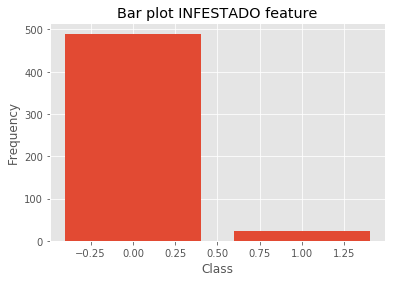

In [93]:
#no_infestado_comu = df_copy[df_copy['INFESTADO']==0]['nro_habitantes'].value_counts()
#infestado_comu = df_copy[df_copy['INFESTADO']==1]['nro_habitantes'].value_counts()
#df = pd.DataFrame([infestado_comu,no_infestado_comu])
#df.index = ['INFESTADO','NO INFESTADO']
#df.plot(kind='bar',stacked=True, figsize=(15,8))

print("Looking for outliers: {}".format(dataframe_infestado.isnull().sum()))
print("\nClass balance, INFESTADO: {} Not INFESTADO: {}".format(df.query("INFESTADO == 1").shape[0], \
                                                              df.query("INFESTADO == 0").shape[0]))
plt.bar([0, 1], [df.query("INFESTADO == 0").shape[0], df.query("INFESTADO == 1").shape[0]])
plt.title("Bar plot INFESTADO feature")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()